# Week 45

In [2]:
try:
    import fysisk_biokemi
    print("Already installed")
except ImportError:
    %pip install -q "fysisk_biokemi[colab] @ git+https://github.com/au-mbg/fysisk-biokemi.git"

------------------------------------------------------------------------

## Average properties of amino acids and proteins.

In [3]:
import numpy as np

In the accompanying Excel file (`week46_1_AA_frequency.xlsx`), you will
find a table that contains the molecular weight of the 20 common amino
acid residues, i.e. their weight as residues in a peptide chain.
Additionally, you will find their relative frequency in E. coli
proteins, where a frequency of 0.01 means that this residue constitutes
1 % of the residues in a protein.

#### (a) Load the data file.

Use the widget below to load the `week46_1_AA_frequency.xlsx` file.

In [4]:
from IPython.display import display 
from fysisk_biokemi.widgets import DataUploader
uploader = DataUploader()
uploader.display()

The command below will display the table as a `DataFrame`.

In [5]:
df = uploader.get_dataframe()
display(df)

#### (b) Average molecular weight

Calculate the average molecular weight of a residue in a protein. To do
this our procedure will be as follows

1.  First calculate the residue weight times its frequency in proteins
    for each residue.
2.  Sum these together to get the average molecular weight.

In the cell below finish the calculation of `weight_times_freq` by
extracting the `"MW of AA residue"`-column and `"Frequency in proteins"`
and multiplying them together.

> **Tip**
>
> You can index in the dataframe by using the column name, for example
> to get the `"MW of AA residue"`-column you would do
>
> ``` python
> col = df["MW of AA residue"]
> ```
>
> Arrays also allows us to operate on every element in the array at the
> same time, so arrays can be added, subtracted, multiplied, divided,
> etc, see for example this figure
>
> ![](https://numpy.org/doc/stable/_images/np_array_dataones.png)
> ![](https://numpy.org/doc/stable/_images/np_sub_mult_divide.png)

In [7]:
weight_times_freq = ...

> **Tip**
>
> You can use `np.sum` to sum all values in an array. For example
>
> ``` python
> array = np.array([1, 2, 3, 4, 5])
> sum_of_array = np.sum(array) # Gives 15 
> ```

In [9]:
average_mw = ...
print(f"{average_mw = :.3f}")

> **Note**
>
> The syntax `f"{average_mw = :.3f}"` is just a way of printing the
> value with a nicer format, in this case we print the value to 3
> decimal places. In Python these are called f-strings, you don’t need
> to understand the details at the moment.

#### (c) Weight of 300-residue protein

What would the molecular weight of a 300-residue protein most likely be,
if you did not know its sequence?

In [11]:
mw_300 = ...
print(f"{mw_300 = :.3f}")

------------------------------------------------------------------------

In many projects, you will be working with a mixture of proteins. This
could for example be a cell lysate or a biological fluid for protein
abundance analysis, or the early stages of a protein purification
process. In these situations, you cannot work with a molecule specific
extinction coefficient. Instead, we would use the average values, which
we will determine below.

------------------------------------------------------------------------

#### (d) Average concentration of residues

Calculate the average concentration of amino acid residues in a protein
mixture at 1 mg/mL.

In [13]:
c_residue_avg = ...
print(f"{c_residue_avg = :3.3f} M")

#### (e) Absorbance

Calculate the absorbance from such a mixture under the assumption that
only Trp and Tyr contribute.

In [15]:
freq = df.set_index("Name")["Frequency in proteins"]
f_trp = freq["Tryptophan (Trp/W)"]
f_tyr = freq["Tyrosine (Tyr/Y)"]
c_trp = ... # Erstat med din kode.
c_tyr = ... # Erstat med din kode.

print(f"{c_trp = :3.5f}")
print(f"{c_tyr = :3.5f}")

In [17]:
A280 = ... # Erstat med din kode.
print(f"{A280 = :3.3f}")

#### (f) Adsorbance $\rightarrow$ concentration

For a cell lysate, you measure and absorbance of 0.78 at a path length
of 0.5 cm. What is the protein concentration?

In [19]:
# Set known values:
A = 0.78 # Unitless
l = 0.5 # cm

# Extract frequencies
freq = df.set_index("Name")["Frequency in proteins"]
f_trp = freq["Tryptophan (Trp/W)"]
f_tyr = freq["Tyrosine (Tyr/Y)"]

# Calculate extintinction coefficent in [L/(mol cm)]
eps_mix = ...
# Calculate molar concentration [mol/L]
c_res = ...
# Calculate concentration [g/L] = [mg/mL]:
conc_mg_per_mL = ...
print(f"Protein concentration = {conc_mg_per_mL:.3f} mg/mL")

------------------------------------------------------------------------

## UV spectrum of apo- and holo-myoglobin

In [21]:
import matplotlib.pyplot as plt

In this exercise we will analyze the spectra of apo- and holo-myoglobin.
The dataset is given in `uv_spectra_apo_holo_myo.csv`.

#### (a) Load the dataset

Use the widget to load the dataset.

In [22]:
from IPython.display import display 
from fysisk_biokemi.widgets import DataUploader
uploader = DataUploader()
uploader.display()

Run this cell **after** having uploaded the file in the cell above.

In [23]:
df = uploader.get_dataframe()
display(df)

#### (b) Plot the spectra

Using `matplotlib` plot each spectrum in the same figure as line plots.

In [25]:
fig, ax = plt.subplots() 

# This selects the 'holo_absorbance'-column and plots it
ax.plot(df['wavelength'], df['holo_absorbance'], label='Holo')

# Copy the line above and edit it to also plot the Apo absorbance
... # Your code here

ax.set_ylabel('Absorbance (AU)')
ax.set_xlabel('Wavelength (nm)')

Based on the spectra explain what ApoMb and HoloMb represent?

------------------------------------------------------------------------

You have learned that pure proteins without any UV/Vis-absorbing
prosthetic groups bound, have basically no absorbance at wavelengths
above λ\>320 nm. Nevertheless ApoMb still show some absorbance above 320
nm. In this case, it can explained by the fact that ApoMb was generated
from HoloMb by a procedure that will not be explained here.

------------------------------------------------------------------------

#### (d) Adsorption above 320 nm.

Explain why ApoMb in the spectrum above absorbs light at λ\>320 nm.

#### (e) Efficiency estimate.

Give a rough estimate of the efficiency of the chosen procedure of
heme-group removal.

#### (f) Isobestic points

Are there any isobestic points between the two spectra?

------------------------------------------------------------------------

To get a better understanding of the causes for the different spectra,
you can compare to litterature. The figure below shows the absorbance
spectra of three states of myoglobin.

$$
\begin{aligned}
\mathrm{MbFe(II)O_2} &\Rightarrow \mathrm{oxyMb} \\
\\
\mathrm{MbFe(III)} &\Rightarrow \mathrm{metMb} \\
\\
\mathrm{MbFe(II)} &\Rightarrow \mathrm{deoxyMb}
\end{aligned}
$$

<figure>
<img
src="https://raw.githubusercontent.com/au-mbg/fysisk-biokemi/refs/heads/main/lessons/figures/apo-holo-figure.jpg"
alt="Absorbance spectra of different states of myoglobin. \mathrm{MbFe(II)O}_2 is “oxyMb”, \mathrm{MbFe(III)} is “metMb” and \mathrm{MbFe(II)} is “deoxyMb”. Taken from Barham et al (2010); ChemRev; 110 (4); pp2313-2365" />
<figcaption aria-hidden="true">Absorbance spectra of different states of
myoglobin. <span class="math inline">MbFe(II)O<sub>2</sub></span> is
“oxyMb”, <span class="math inline">MbFe(III)</span> is “metMb” and <span
class="math inline">MbFe(II)</span> is “deoxyMb”. Taken from Barham et
al (2010); ChemRev; 110 (4); pp2313-2365</figcaption>
</figure>

#### (g) Aged myoglobin

metMb $(\mathrm{MbFe(III)})$ is normally described as ‘aged’ myoglobin.
What does this mean in terms of the bound iron?

#### (h) Change in absorbance

Give a qualitative explanation to the observed change in absorbance of
metMb compared to fresh oxy-/deoxyMb?

#### (I) Type of shift

Is the spectral difference from deoxyMb to metMb a redshift or a
blueshift?

#### (J) Experiment design

You would like to set up an experiment where the absorbance of myoglobin
at defined wavelength(s) should be used to measure the level of
$\mathrm{O}_2$ binding. Sketch how the absorbance spectra would look
like when going from deoxyMb and continuously increasing the
concentration of $\mathrm{O}_2$ (draw this for five different
$\mathrm{O}_2$ concentrations going from pure deoxyMb to pure oxyMb)

------------------------------------------------------------------------

## Proteins in blood plasma.

In this exercise we will learn how Python is excellent for handling
datasets with many data points and how it can be used to apply the same
procedure to all the data points at once.

A researcher wants to determine the concentration of two proteins in
blood plasma that is suspected to be involved in development of an
autoimmune disease. 500 patients and 500 healthy individuals were
included in the study and absorbance measurements of the two purified
proteins from all blood plasma samples were measured at 280 nm. The
molecular weight and extinction coefficients of the two proteins are
given in the table below.

| Protein | $M_w$ $[\text{kDa}]$ | $\epsilon$ $[\text{M}^{-1}\text{cm}^{-1}]$ |
|-----------------------|---------------------|-----------------------------|
| 1       | 130                  | 180000                                     |
| 2       | 57                   | 80000                                      |

Properties of the two proteins.

#### (a) Load the dataset

Use the widget to load the dataset as a dataframe from the file
**week47_3_protein_blood_plasma.xlsx**

In [27]:
from IPython.display import display 
from fysisk_biokemi.widgets import DataUploader
uploader = DataUploader()
uploader.display()

Run this cell **after** having uploaded the file in the cell above.

In [28]:
df = uploader.get_dataframe()
display(df)

#### (b) Calculate concentrations

Calculate the molar concentration of the two proteins in all samples,
the light path for every measurement is 0.1 cm.

Always a good idea to assign known values to variables

In [30]:
protein_1_ext_coeff = 180000
protein_2_ext_coeff = 80000
l = 0.1

> **Tip**
>
> You can set new columns in a `DataFrame` by just assigning to it
>
> ``` python
> df['new_column'] = [1, 2, 3, ..., 42]
> ```
>
> It can also be set as a computation of a property from another row
>
> ``` python
> df['new_column'] = df['current_column'] / 4
> ```

In [31]:
df['protein1_healthy_molar_conc'] = ... # Calculate for concentration in healthy for protein 1.
... # Your code that updates the data frame with the 3 other new columns.
display(df)

#### (c). Concentrations in mg/mL

Add another set of four columns containing the concentrations in mg/mL.

In [33]:
protein_1_mw = 130 * 10**3
protein_2_mw = 57 * 10**3

In [34]:
df['protein1_healthy_conc'] = ...
df['protein1_patient_conc'] = ...
df['protein2_healthy_conc'] = ...
df['protein2_patient_conc'] = ...

names = ['protein1_healthy_conc', 'protein1_patient_conc', 'protein2_healthy_conc', 'protein2_patient_conc']
display(df[names])

#### (d) Mean concentration

Now that we have the concentrations, calculate the concentration in the
four categories.

> **Tip**
>
> When displaying the dataframe above we used indexed it with `names` as
> `df[names]`. We can do the same to compute something over just the
> four rows.
>
> For example the if we have a `DataFrame` called `example_df`, we can
> calculate the mean over the **rows** as:
>
> ``` python
> df[names].mean(axis=0)
> ```
>
> Here `axis=0` means that we apply the operation over the first axis
> which by convention are the rows. The figure below visualizes this
>
> ![](https://numpy.org/doc/stable/_images/np_matrix_aggregation_row.png)

In [36]:
mean = ...
display(mean)

#### (e) Standard deviation

Calculate the standard deviation

> **Tip**
>
> The standard deviation can be calculated using the `.std`-method that
> works in the same way as the `.mean`-method we used above.

In [38]:
std = ...
display(std)

#### (f) Analyze the results

Consider the following questions

-   By comparing healthy individuals with patients, would you expect
    that any of the two proteins would be involved in disease
    development?
-   What additional information does the standard deviation provide
    besides the average value of the protein concentration?

------------------------------------------------------------------------

## The fluorescent protein “mCherry”.

The spectra of many fluorescent proteins can be found at the website:
[www.fpbase.org](https://www.fpbase.org/). Go to FPbase and search for
“mCherry”.

#### (a) Find parameters.

Find the following parameters for the protein

-   Extinction coefficient at absorbance maximum
-   Quantum yield
-   The organism from which it was originally isolated
-   Molecular weight

Save them to seperate variables in the cell below.

In [41]:
... # Your answers here. 

#### (b) Adorbance

What is the absorbance of a 1 µM solution of mCherry at its absorption
maximum?

In [42]:
c = ... # Put the concentration in Molar
l = ... # Path length in cm
A_max = ... # Calculate the adsorbance.
print(f"{A_max = :3.3f}")

#### (c) Extinction coefficient from sequence.

The sequence of the protein is also given. From this determine the
extinction coefficient at 280 nm.

Start by taking the sequence from the website and assigning it to the
variable `sequence` in the cell below.

In [44]:
sequence = ... # Your code here

Now use the sequence to calculate the extinction coefficient, finish the
code below (or take the function you implemented in a previous
exercise!)

In [46]:
# This is "dictionary" with the extinction coefficients of the relevant 
# amino acid residues. Dictionaries are indexed with 'keys', so you can retrieve
# the value for W as: ext_residue["W"].
ext_residue = {"W": 5500, "Y": 1490, "C": 125}

# Write code to calculate the extinction coefficent
...

Ellipsis

#### (d) What is the concentration of a 1 µM solution of mCherry in mg/mL?

In [48]:
conc_molar = ... # Put the concentration in units of M. 
conc_mg_mL = ... # Calculate the concentration in uts of mg/mL.
print(f"{conc_mg_mL = }")

------------------------------------------------------------------------

The excitation and emission spectra can be downloaded as a csv-file by
clicking the download icon as highlighted below

<img width=300 src="https://raw.githubusercontent.com/au-mbg/fysisk-biokemi/refs/heads/main/lessons/figures/week_47/download_spectra.png">

Figure 1: Screenshot of the download button on fpbase

------------------------------------------------------------------------

#### (e) Load the dataset

Use the widget below to load the dataset as a `DataFrame`

In [50]:
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [51]:
df = uploader.get_dataframe()
display(df)

#### (f) Plot spectra

Make your own plot showing the excitation and emission spectra of
“mCherry” using the above data.

> **Tip**
>
> To plot we use the `matplotlib` package. Plots are generally just
> straight lines connecting points, with enough points we get a smooth
> looking figure.
>
> For example, to plot a line connecting three datapoints
>
> ``` python
> fig, ax = plt.subplots()
>
> x = np.array([1, 2, 3])
> y = np.array([1, 4, 9])
> ax.plot(x, y)
> plt.show()
> ```
>
> Line 1  
> This creates a `fig` and an `ax`, the `ax`-object is the box where our
> plot is created.
>
> Line 3  
> Define the data to put on the x-axis.
>
> Line 5  
> Does the actual plotting
>
> Line 6  
> Shows the figure
>
> There are *many* ways of customizing plots, you will see different
> ones in the exercises, but by no means all of them - if you are
> interested you can find more information on the [matplotlib
> documentation](https://matplotlib.org/stable/users/index).
>
> You don’t have to worry about the `NaN` values in the dataset when
> plotting, matplotlib just skips plotting that line segment.

In [53]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(..., ..., label='Excitation') # Replace ... with your code
... # Replace ... with your code plotting the emission spectrum.
ax.legend()
ax.set_xlabel('Wavelength')
ax.set_ylabel('Extinction & Emission')
plt.show()

#### (g) Stokes shift

What is the Stokes shift of mCherry?

> **Tip**
>
> If you have two arrays `A` and `B` you can find the entry in `A`
> corresponding to the largest value in `B` like this
>
> ``` python
> A_at_B_max = A[np.argmax(B)]
> ```
>
> The `np.argmax` stands for **arg**ument **max**imum meaning that it
> finds the index of the maximum value in a given array. The figure
> below illustrates this
>
> <img width=300 src="https://raw.githubusercontent.com/au-mbg/fysisk-biokemi/refs/heads/main/lessons/figures/week_47/np_argmax.png">
>
> Figure 2: Illustration of argmax

In [55]:
import numpy as np
# Start by extracting the wavelengths from the DataFrame
wavelengths = ...

# Find the indices
ex_max_idx = np.argmax(...)
em_max_idx = ...

# Use the index to find the corresponding wavelengths
lambda_ex = wavelengths[...]
lambda_em = ...

stokes_shift = ...

print(f"{lambda_ex = :d}")
print(f"{lambda_em = :d}")
print(f"{stokes_shift = :d}")

#### (h) Colors

What colors are the light that correspond to the excitation and emission
maxima respectively?

------------------------------------------------------------------------

## Tryptophan absorption and fluorescence

In [57]:
from fysisk_biokemi.datasets import load_dataset
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 6)

You investigate a protein that neither contains tyrosine nor cysteine
residues. A 37 µM solution gives an absorbance of 0,41 at 280nm at a
light path of 1 cm.

#### (a) Number of residues

How many tryptophan residues does the protein contain?

#### (b) Concentration

You would like to conduct a protein stability experiment at an
absorbance of 0,8 (path length 1cm). What concentration should you use?

#### (c) Spectra & Stokes Shift

The cell below loads extinction and emission spectra for tryptophan in
aqueous buffer. (The data files are `week47_1_tryp_emi.xlsx` and
`week47_1_tryp_ext.xlsx`)

In [58]:
df_emission = load_dataset('week47_1_emi')
df_extinction = load_dataset('week47_1_ext')
display(df_emission)
display(df_extinction)

399 rows × 2 columns

399 rows × 2 columns

In [59]:
print(df_extinction.keys())

Index(['wavelength_(nm)', 'molar_extinction_(cm-1/M)'], dtype='object')

Make plot showing the two spectra and determine the Stokes shift.

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3), layout='constrained')

# Emission 
ax = axes[0]
ax.set_title('Emission')

# Replace ... with your code.
ax.plot(..., ..., label='Emission', color='C0')

ax.set_ylabel('Emission')
ax.set_xlabel('Wavelength [nm]')

# Extinction
ax = axes[1]
ax.set_title('Extinction')

# Replace ... to plot the extinction spectrum
...

ax.set_ylabel('Extinction')
ax.set_xlabel('Wavelength [nm]')
plt.show()

Recall that we have used `np.argmax` to determine the maximum index
before, use that to calculate the Stokes shift

In [62]:
max_index = np.argmax(...) # Replace ... to get the index of the maximum of the emission spectrum
emission_wavelength_max = df_emission['wavelength_(nm)'][max_index]

max_index = ... # Replace ... to get the index of the maximum of the extinction spectrum
extinction_wavelength_max = df_extinction[...][...] # Use the index to get the wavelength at of the maximum.

print(f"{emission_wavelength_max = :.1f} nm")
print(f"{extinction_wavelength_max = :.1f} nm")

#### (d) pH and how it changes pHroperties.

Next, you compare the fluorescence emission spectra for your protein at
pH 7 and at pH 2. You can find the data in the files
`week47_1_tryp_ph2.xlsx` and `week47_1_tryp_ph7.xlsx` - the cell below
also loads these datasets

In [64]:
df_ph2 = load_dataset('week47_1_ph2')
df_ph7 = load_dataset('week47_1_ph7')
display(df_ph2, df_ph2)

46 rows × 2 columns

46 rows × 2 columns

Make a plot comparing the two emission spectra. Which resembles the
spectrum of tryptophan in water most?

In [65]:
fig, ax = plt.subplots()

ax.plot(..., ..., label='pH = 2') # Replace to plot at pH = 2
... # Replace to plot at pH = 7

ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('Flouresence [AU]')
plt.show()

#### (e) for Explain

Explain why the same protein gives such different spectra at pH 2 and pH
7.  

------------------------------------------------------------------------

## Extinction coefficient of human myoglobin

The protein of human myoglobin is given below

In [67]:
sequence = """GLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASEDLKKHGA
TVLTALGGILKKKGHHEAEIKPLAQSHATKHKIPVKYLEFISECIIQVLQSKHPGDFGADAQGAMNKALELFRKDMASNY
KELGFQG"""

We want to calculate the *extinction coefficient* of this protein, we
have seen that this can be calculated using the formula

<span id="eq-extinction">$$
\epsilon(280 \mathrm{nm}) = N_{Trp} \epsilon_{Trp} + N_{Tyr} \epsilon_{Tyr} + N_{Cys} \epsilon_{Cys} 
 \qquad(1)$$</span>

Where $N_{Trp}$ is the number of Tryptophan in the protein (and likewise
for the other two terms), and the three constants $A$, $B$ and $C$ are
given as

$$
\begin{align}
\epsilon_{Trp} &= 5500 \ \mathrm{M^{−1} cm^{−1}} \\
\epsilon_{Tyr} &= 1490 \ \mathrm{M^{−1} cm^{−1}} \\
\epsilon_{Cys} &= 125 \ \mathrm{M^{−1} cm^{−1}}
\end{align}
$$

In order to calculate the formula we need to know the count of the
relevant residues, we can use Python to get that - for example we can
count the number of Tryptophan like so;

In [68]:
N_trp = sequence.count("W")

#### (a) Determine the number of residues

In the cell below find the number of residues

In [70]:
N_tyr = ... # Your code here
... # Your code here for the N_cys.

You can check what Python has stored each variable by using `print`

In [71]:
print(N_trp)
print(f"{N_tyr = }") # This is just a way of make a string that looks nice.
print(f"{N_cys = }")

2
N_tyr = 2
N_cys = 1

#### (b) Calculate the extinction coefficient

Use equation
(<a href="#eq-extinction" class="quarto-xref">Equation 1</a>) to
calculate the extinction coefficient of human myoglobin.

In [72]:
eps_trp = 5500
eps_tyr = 1490
eps_cys = 125

In [73]:
epsilon = ... # Erstat ... med din kode.
print(epsilon)

What are the units of this value?

#### (c) Compare residue count to ProtParam

ProtParam is an online tool that calculates various physical and
chemical parameters from a given protein sequence and is used worldwide
in research laboratories.

<figure>
<img
src="https://raw.githubusercontent.com/au-mbg/fysisk-biokemi/refs/heads/main/lessons/figures/week_46/protpram_input.png"
alt="Protpram tool input page." />
<figcaption aria-hidden="true">Protpram tool input page.</figcaption>
</figure>

Go to ProtPram at this link: <https://web.expasy.org/protparam/> and
paste the sequence and click **Compute Parameters**. You should then see
the calculated parameters, similar to in the image below

<figure>
<img
src="https://raw.githubusercontent.com/au-mbg/fysisk-biokemi/refs/heads/main/lessons/figures/week_46/protpram_output.png"
alt="Protpram tool calculated properties." />
<figcaption aria-hidden="true">Protpram tool calculated
properties.</figcaption>
</figure>

On the output page you will see the number of residues, does that match
your calculation?

#### (d) Calculate the absorbance

Using the extinction coefficient and the molecular weight given by
ProtParam, calculate the absorbance at 280 nm of a myoglobin solution at
a concentration of 1 mg/mL in a cuvette with a light path of 1 cm.

In [76]:
molecular_weight = ... # Find the value on ProtPram (It has units of g/mol)
path_length = ... # Set the value of the path length
concentration = ... # Set the value of the concentraiton.

Remember to convert the concentration to $\mathrm{mol/L}$.

In [77]:
A280 = ...
print(A280)

This value is what is known as the A280(0.1%) of a protein, i.e. the
absorbance of a given protein at a concentration of 0.1% weight/volume
(= 1 g/L = 1 mg/mL).

#### (e) Tintin

We have now calculated the extinction coefficient of a protein, now we
will make our code more reusable so that it can be applied to other
proteins easily.

> **Note**
>
> A function in Python is a set of instructions, like a recipe, that can
> be defined and reused multiple times. The syntax is like this
>
> ``` python
> def my_function(input_1, input_2):
>     # Some operation 
>     some_internal_variable = input_1 + input_2
>     ... 
>     return something_weve_calculated
> ```
>
> Line 1  
> The `def` command is used to define the functions name, here
> `my_function`, and state its inputs, e.g. the name and ingredients of
> a recipe.
>
> Line 3  
> The body of the function defines what it does, the body can have any
> number of lines of code. Similar to the instructions of a recipe.
>
> Line 5  
> Finally, the function can `return` something, like the final product
> of a recipe.
>
> Note that the function is not executed by doing this, like how a cake
> isn’t baked by writing down the recipe, in order actually use the
> function it needs to be *called*
>
> ``` python
> output = my_function(1, 2)
> ```
>
> This is also how we have already used other functions like `print`.

The way of doing so is by defining a function that does the necessary
operations for a given sequence. In this way the code can be reused for
any sequence.

Finish implementing the body of the function below, note that you have
already written all the required code - you just need to copy it into
the function.

In [79]:
def extinction_coefficient(sequence):

    # Start by counting
    ...

    # Define the residue extinction coeffiecients
    eps_trp = 5500
    eps_tyr = 1490
    eps_cys = 125

    # Calculate 
    epsilon = ...

    return epsilon

It’s always a good idea to check that functions do what we expect, so we
can confirm that it gives the same result for human myoglobin as we
calculated before

In [81]:
epsilon_func = extinction_coefficient(sequence)
print(f"Epsilon: {epsilon}")
print(f"Epsilon from function: {epsilon_func}")

The largest known protein is Titin, the cell below loads the sequence of
titin and prints a few bits of information about it.

In [83]:
from fysisk_biokemi.datasets import load_dataset
titin_sequence = load_dataset('titin')

print(f'Titin number of residues: {len(titin_sequence)}')
print('First 100 residues')
print(titin_sequence[0:100])

Use your function to calculate the extinction coefficient of titin.

In [85]:
titin_eps = ... # Your code here. 
print(titin_eps)

------------------------------------------------------------------------

> **Tip**
>
> You don’t need to understand the code below, it’s just ment to
> illustrate that knowing some Python will allow you to explore the
> topics that interest you in more detail.

In general Python is very powerful at letting us explore properties of
sequences, for example the cell below calculates number of residues
between each Tryptophan in the Titin sequence and plot the distribution.

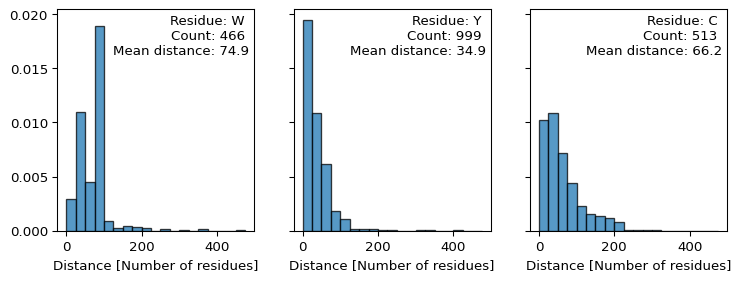

In [87]:
import numpy as np
import matplotlib.pyplot as plt

def get_distance(sequence, letter):
    W_index = np.argwhere(np.array([l for l in sequence]) == letter)
    count = len(W_index)
    distance = (W_index - np.roll(W_index, 1))[1:]
    return distance, count

letters = ['W', 'Y', 'C']

fig, axes = plt.subplots(1, 3, figsize=(3*3, 3), sharey=True)
axes = axes.flatten()

for ax, letter in zip(axes, letters):
    distance, count = get_distance(titin_sequence, letter)
    ax.hist(distance, bins=np.arange(0, 500, 25), 
        edgecolor='black', alpha=0.75, density=True)
    ax.set_xlabel('Distance [Number of residues]')
    info = f'Residue: {letter} \nCount: {count} \nMean distance: {np.mean(distance):.1f}'
    ax.text(0.975, 0.975, info, transform=ax.transAxes, ha='right', va='top')